In [1]:
from keras.datasets import mnist

2022-10-22 14:29:57.203450: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-22 14:29:57.203479: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


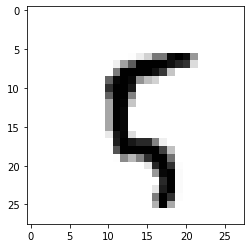

5
(28, 28)


In [7]:
import matplotlib.pyplot as plt
secilen=100
digit=train_images[secilen]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print(train_labels[secilen])
print(digit.shape)

In [3]:
# yapay sinir ağları
# ağ modelini kuruyoruz
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(16,activation="relu",input_shape=(28*28,)))
network.add(layers.Dense(16,activation="relu"))
network.add(layers.Dense(10,activation="softmax"))

2022-10-22 14:30:55.716142: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-22 14:30:55.724890: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-22 14:30:55.725230: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (serkan-pc): /proc/driver/nvidia/version does not exist
2022-10-22 14:30:55.789916: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
network.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [5]:
train_images=train_images.reshape(60_000,28*28)
train_images = train_images.astype("float32")/255

test_images=test_images.reshape(10_000,28*28)
test_images=test_images.astype("float32")/255



# print(test_images[4])

In [6]:
from keras.utils import to_categorical

In [17]:
print(train_labels.shape)
print(train_labels.ndim)
print(train_labels.dtype)
print(train_labels)

(60000,)
1
uint8
[5 0 4 ... 5 6 8]


In [7]:
train_labels=to_categorical(train_labels)


In [19]:
print(train_labels.shape)
print(train_labels.ndim)
print(train_labels.dtype)
print(train_labels)

(60000, 10)
2
float32
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [18]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

2022-10-22 15:05:17.670692: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1477 - accuracy: 0.9566
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1416 - accuracy: 0.9586
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1376 - accuracy: 0.9600
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1339 - accuracy: 0.9607
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1306 - accuracy: 0.9620


In [10]:
network.save("mnist_ysa.h5")


In [11]:
print(network)

In [30]:
tahmin=test_images[30]
print(test_labels[30])
print(tahmin.shape)


3
(784,)


In [29]:
pred=network.predict(test_images)


313/313 [==============================] - 1s 4ms/step


In [39]:
pred[40]
for i in range(10):
    print(f"{i} için tahmin değeri={pred[40,i]}")

0 için tahmin değeri=0.00023901548411231488
1 için tahmin değeri=0.9888628721237183
2 için tahmin değeri=0.0009066417696885765
3 için tahmin değeri=0.0008717039017938077
4 için tahmin değeri=0.001286239828914404
5 için tahmin değeri=0.00019761598377954215
6 için tahmin değeri=0.00015101900498848408
7 için tahmin değeri=0.0025520247872918844
8 için tahmin değeri=0.002555247861891985
9 için tahmin değeri=0.002377530559897423


(784,)
(28, 28)


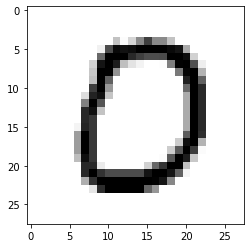

In [50]:
import matplotlib.pyplot as plt
secilen=10
digit=test_images[secilen]
print(digit.shape)
digit=digit.reshape(28,28)
print(digit.shape)
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

In [44]:
pred2=network.predict(test_images[10].reshape(1,784))


1/1 [==============================] - 0s 104ms/step


In [49]:
# print(pred2)
for i in range(10):
    print(f"{i} için tahmin değeri={pred2[0,i]}")

0 için tahmin değeri=0.9998176693916321
1 için tahmin değeri=9.524979027730751e-09
2 için tahmin değeri=0.00016933992446865886
3 için tahmin değeri=1.6885802978094944e-08
4 için tahmin değeri=5.881296374354861e-07
5 için tahmin değeri=2.6167915621044813e-06
6 için tahmin değeri=5.261198765538211e-08
7 için tahmin değeri=2.0050172224728158e-06
8 için tahmin değeri=1.8256566818308784e-06
9 için tahmin değeri=5.981127287668642e-06


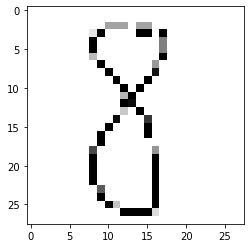

In [149]:
import cv2
rakam=cv2.imread("/home/serkan/Belgeler/yillar/2022-2023/2022-oyg2-s1/yapay_zeka/rakam3.png")
rakam=cv2.cvtColor(rakam,cv2.COLOR_BGR2GRAY)
ret,rakam = cv2.threshold(rakam,127,255,cv2.THRESH_BINARY)
rakam=cv2.resize(rakam,(28,28),interpolation=cv2.INTER_LINEAR)
import matplotlib.pyplot as plt
rakam=cv2.bitwise_not(rakam)
plt.imshow(rakam,cmap=plt.cm.binary)
plt.show()

In [150]:
rakam=rakam.reshape(1,784)
rakam=rakam.astype("float32")/255



In [151]:
pred3=network.predict(rakam)

1/1 [==============================] - 0s 40ms/step


In [152]:
for i in range(10):
    print(f"{i} için tahmin değeri={pred3[0,i]}")

0 için tahmin değeri=0.08304768800735474
1 için tahmin değeri=9.79591059149243e-05
2 için tahmin değeri=0.03347116336226463
3 için tahmin değeri=0.15756003558635712
4 için tahmin değeri=0.00011666317004710436
5 için tahmin değeri=0.12567853927612305
6 için tahmin değeri=0.555881142616272
7 için tahmin değeri=0.003295819740742445
8 için tahmin değeri=0.019817493855953217
9 için tahmin değeri=0.02103349380195141
